#**宽度优先搜索的应用场景**
1. 找连通块：通过一个点找到与它联通的其他点；
2. 遍历
3. 求所有路径（方案） <- 连通块问题

**1. 找全子集的问题**
## **给定一个含不同元素的集合，求所有的子集。eg. 求{1,2,3}的所有子集**
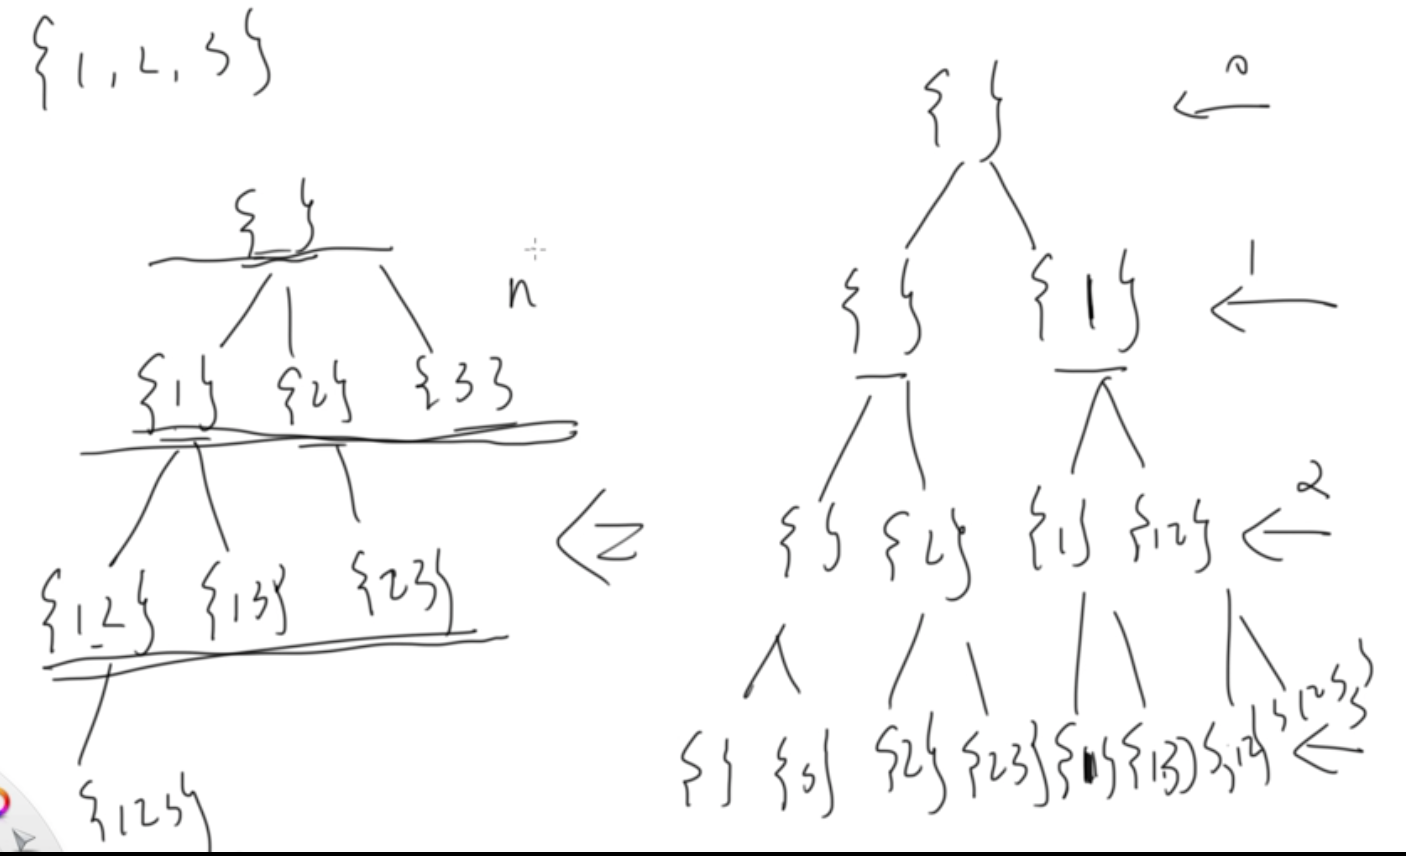

搜索树1：每一层加后面一个数，一共C(4,0)+C(4,1)+C(4,2)+C(4,3)+C(4,4) = 2^4 = 16 个节点;

搜索树2：考虑每一层是否是否要加某个数，一共2^0+2^1+2^2+2^3+2^4 = 31个节点

In [4]:
# 第一种搜索的实现
def subset(nums):
  if not nums:
    return [[]]

  queue = [[]]
  index = 0    # 不用pop的方法来调出queue中的元素，而是用指针来指向要操作的元素
  while index < len(queue):   # 将所有的子集都过了一遍，看是否能加一个大数
    subset = queue[index]
    index += 1
    for num in nums:
      if subset and subset[-1] >= num:   # 注意一定要有等于号
        continue
      queue.append(subset + [num])
  return queue

subset({1,3,2})

[[], [1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]

In [5]:
# 第二种搜索的实现
def subset(nums):
  if not nums:
    return [[]]
  
  result = [[]]
  for num in nums:
    for i in range(len(result)):
      subset = result[i]
      result.append(subset + [num])
  return result

subset({1,3,2})

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

**2. 最小子集**

给定一个非负整数的集合，求一个最小长度的子集，要求这个子集的和大于集合中剩余元素之和;返回该子集的长度。

eg. [1,2,1]     
满足条件的最小子集为[1,2], 1+2 > 1       
返回结果：2

In [19]:
def smallest_subset(nums):
  if not nums:
    return 0
  
  total = sum(nums)
  #print(total)
  queue = [[]]

  for num in nums:
    for i in range(len(queue)):
      subset = queue[i] + [num]
      if sum(subset) > total - sum(subset):
        print(subset)
        return len(subset)
      queue.append(subset + [num])

smallest_subset({3,1,7,1})   

[7]


1

**3. 二叉树的序列化**

序列化： 支持结构化object -> string, string -> 结构化object

当内存中的数据需要写入硬盘永久存储时，当数据进行网络传输时，需要将结构化数据序列化；序列化手段如xml, json。

序列化的例子：    
一个整数链表，[1,2,3]可序列化为1—>2->3      
一个hashmap可以序列化为{"\key\":"\value\"}

序列化算法需要考虑的因素：1. 压缩率； 2. 可读性

**二叉树使用BFS进行序列化**

In [ ]:
class TreeNode:
  def __init__(self, val):
    self.val = val
    self.left = None
    self.right = None

class Solution:
  def serialize(self, root):
    if not root:
      return []
  
    queue = [root]
    index = 0
    while index < len(queue):
      current_node = queue[index]
      index += 1
      if current_node:
        queue.append(current_node.left)    #如果left、right是None，也加入到queue中
        queue.append(current_node.right)
    
    # 最后的一批None node去掉
    while queue[-1] is None:
      queue.pop() 


    string = ",".join([str(node.val) 
                        if node is not None else "#" 
                        for node in queue])
    return string
  
 
  def deserialize(self, string):
    if string is None or len(string) == 0:
      return None

    vals = string.split(",")
    root = TreeNode(vals[0])
    index = 0 
    queue = [root]
    is_leftchild = True

    for val in vals[1:]:
      current_node = queue[index]
      if val != "#":
        node = TreeNode(val)        # val=="#"的不用专门考虑，因为将val写成node时都会默认node.left, node.right = None, None
        if is_leftchild:
          current_node.left = node
        else:
          current_node.right = node
        queue.append(node)

      if not is_leftchild:     # 处理过right node之后才将index加1
        index += 1
      
      is_leftchild = not is_leftchild     #换成rightchild
    
    return root


#**双向宽度优先搜索**

**双向宽度优先搜索模板**

In [ ]:
forward_queue = 所有起点
backward_queue = 所有终点
forward_set = 标记所有起点访问过
backward_set = 标记所有终点访问过

distance = 0
while forward_queue 和 backward_queue 非空:
  distance ++
  for 所有forward_queue里的点:
    拓展出下一层节点加入forward_queue，并在forward_set中标记
    如果有在backward_set中出现,则return distance
  distance ++
  for 所有forward_queue里的点:
    拓展出下一层节点加入backward_queue，并在backward_set中标记
    如果有有在forward_set中出现,则return distance

**611. 跳马问题 Knight shortest path**

Input: [[0,0,0], [0,0,0], [0,0,0]]     
source: [2, 0], destination: [2, 2]    
Output: 2      
Explanation: [2,0] -> [0,1] -> [2,2]   
note: knight走斜角


In [ ]:
from collections import deque

class Point:
  def __init__(self, a, b):
    self.x = a
    self.y = b

class Solution:
